In [3]:
import sys
sys.path.append('/home/jxm3/research/deidentification/unsupervised-deidentification')

from dataloader import WikipediaDataModule

num_cpus = 8

dm = WikipediaDataModule(
    document_model_name_or_path='roberta-base',
    profile_model_name_or_path='google/tapas-base',
    dataset_name='wiki_bio',
    dataset_train_split='train[:256]',
    dataset_val_split='val[:256]',
    dataset_test_split='test[:100%]',
    dataset_version='1.2.0',
    num_workers=num_cpus,
    train_batch_size=256,
    eval_batch_size=256,
    max_seq_length=128,
    sample_spans=False,
)
dm.setup("fit")

Initializing WikipediaDataModule with num_workers = 8 and mask token `<mask>`
loading wiki_bio[1.2.0] split train[:256]
loading wiki_bio[1.2.0] split val[:256]
loading wiki_bio[1.2.0] split test[:100%]
                        

In [7]:
import pandas as pd
all_words = pd.DataFrame([word for document in dm.test_dataset["document"] for word in document.split()], columns=['word'])

In [15]:
import pickle
idf = pickle.load(open('../test_val_train_100_idf.p', 'rb'))

In [16]:
all_words['idf'] = all_words['word'].map(lambda word: idf[word] if word.isalnum() else 0.0)

<AxesSubplot:>

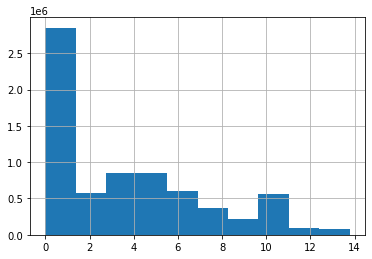

In [14]:
all_words['idf'].hist()

In [23]:
real_words = all_words[all_words['word'].map(lambda s: s.isalnum())]

<AxesSubplot:>

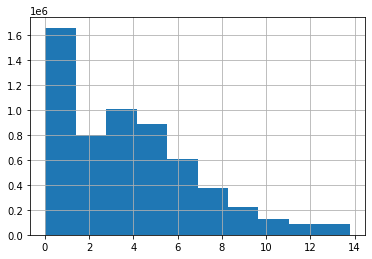

In [24]:
real_words['idf'].hist()

In [25]:
import numpy as np


for q in np.arange(0, 1.0, 0.1):
    print(q, real_words.quantile(q=q)['idf'])

0.0 0.02632505999650725
0.1 0.2231668755220113
0.2 0.7574916085316836
0.30000000000000004 1.5308201910654393
0.4 2.5931347491133714
0.5 3.433411223104665
0.6000000000000001 4.225546488366417
0.7000000000000001 5.092897518672954
0.8 6.221167463031721
0.9 7.977694462485977
